In [1]:
# Import all the things

import json
import pandas as pd
import numpy as np
import wrangle
import acquire
from prepare import basic_clean, tokenize, lemmatize, stem, remove_stopwords, prep_string_data#, split_data

import re
from sklearn.feature_extraction.text import TfidfVectorizer

from wordcloud import WordCloud
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

import nltk

from scipy import stats

import warnings
warnings.filterwarnings("ignore")

In [2]:
# use our own wrangle to get the data
# df = wrangle.get_npr_data()
# df.head()

### I'm interested in topic modeling on a story-level basis
### So I will need to groupby story_id_num

In [3]:
# df = df.sort_values(by=['story_id_num','utterance_order'])
# df.head()

In [4]:
# df = df[['story_id_num','utterance_order','title','lemmatized']]

In [5]:
# df_sample = df[:100]
# df_sample

In [6]:
# df_sample.shape

In [7]:
# pd.DataFrame(df_sample.groupby('title').apply(list).reset_index())

In [8]:
# df_sample.groupby(['story_id_num']).title.first()

In [9]:
# # group every story as an aggregation of all its utterances
# df_sample.groupby(['story_id_num']).lemmatized.agg(' '.join)#.iloc[0]

In [10]:
# # group every story as an aggregation of all its utterances and store in a DF
# stories_test = pd.DataFrame(df_sample.groupby(['story_id_num']).lemmatized.agg(' '.join))
# stories_test

In [11]:
# stories.iloc[0].values

### Run the above on the whole df

In [12]:
# df = df.sort_values(by=['story_id_num','utterance_order'])
# df.head()

In [13]:
# df.dtypes

In [14]:
# df.isna().sum()

In [15]:
# df = df.dropna()

#### well...it worked on the sample above
#### had to drop 2 nulls that existed in the lemmatized column

In [16]:
# # group every story as an aggregation of all its utterances and store in a DF
# stories = pd.DataFrame(df.groupby(['story_id_num']).lemmatized.agg(' '.join))
# stories

-  61,165 stories to work with here

In [17]:
# this attempt to get the word count for every story isn't working currently
# stories['word_count'] = df.lemmatized.apply(str.split).apply(len)
# stories.head()

In [18]:
# sia = nltk.sentiment.SentimentIntensityAnalyzer()
# stories['vader'] = stories.lemmatized.apply(lambda doc: sia.polarity_scores(doc)['compound'])
# stories.head()

In [19]:
# stories.to_csv('stories.csv')

In [20]:
stories = pd.read_csv('stories.csv')
stories.head()

,Unnamed: 0,story_id_num,lemmatized,vader,title,date,host,program
0,0,17,he is in cahoot with a foreign government to m...,0.9964,n.j. democrat on reported whistleblower compla...,2019-09-22,melissa block,weekend edition sunday
1,1,18,"come with concrete plan , not beautiful speech...",0.9993,"ahead of climate summit, 2 views from cities i...",2019-09-22,melissa block,weekend edition sunday
2,2,19,if you stand outside the old dekalb county cou...,0.9974,"barred from removing confederate monument, cou...",2019-09-22,melissa block,weekend edition sunday
3,3,20,you may have spotted pink salt in your superma...,0.4950,pakistan's pink himalayan salt has become a ma...,2019-09-22,melissa block,weekend edition sunday
4,4,21,"singing in foreign language . the other day , ...",0.9730,"10 years after haiti's earthquake, 'this music...",2019-09-22,melissa block,weekend edition sunday


In [21]:
stories = stories.drop(columns = ['Unnamed: 0'])

In [22]:
stories.shape

(61165, 7)

In [23]:
# len(df.groupby(['story_id_num']).title.first())

In [24]:
# stories['title'] = df.groupby(['story_id_num']).title.first().tolist()

In [199]:
stories.head()

,story_id_num,lemmatized,vader,title,date,host,program
0,17,he is in cahoot with a foreign government to m...,0.9964,n.j. democrat on reported whistleblower compla...,2019-09-22,melissa block,weekend edition sunday
1,18,"come with concrete plan , not beautiful speech...",0.9993,"ahead of climate summit, 2 views from cities i...",2019-09-22,melissa block,weekend edition sunday
2,19,if you stand outside the old dekalb county cou...,0.9974,"barred from removing confederate monument, cou...",2019-09-22,melissa block,weekend edition sunday
3,20,you may have spotted pink salt in your superma...,0.4950,pakistan's pink himalayan salt has become a ma...,2019-09-22,melissa block,weekend edition sunday
4,21,"singing in foreign language . the other day , ...",0.9730,"10 years after haiti's earthquake, 'this music...",2019-09-22,unidentified singers,weekend edition sunday


In [25]:
# stories['host'] = test[test.is_host==True].groupby('story_id_num').speaker.first().tolist()

In [272]:
# test = df.sort_values(by=['story_id_num'])

In [286]:
# test[test.is_host==True].groupby('story_id_num').speaker.first()

story_id_num
17        melissa block
18        melissa block
19        melissa block
20        melissa block
21        melissa block
              ...      
140737    melissa block
140738    melissa block
140739    robert siegel
140740    robert siegel
140741    melissa block
Name: speaker, Length: 61165, dtype: object

In [238]:
df.head()

,story_id_num,utterance_order,speaker,utterance,program,title,is_host,clean,lemmatized,vader,date
0,57264,9,ms. loren mooney,"It's a 2,200-mile race. To give some sense of ...",talk of the nation,how to watch the tour de france,False,"it s a 2,200 mile race. to give some sense of ...","it s a 2,200 mile race. to give some sense of ...",0.0000,2010-07-12
1,57264,10,ms. loren mooney,So for a top competitor like Lance to try to m...,talk of the nation,how to watch the tour de france,False,so for a top competitor like lance to try to m...,so for a top competitor like lance to try to m...,0.9346,2010-07-12
2,57264,11,neal conan,"So in every team, presumably there's one star,...",talk of the nation,how to watch the tour de france,True,"so in every team , presumably there s one star...","so in every team , presumably there s one star...",0.7096,2010-07-12
3,57264,12,ms. loren mooney,That's right. Each team has nine riders. And w...,talk of the nation,how to watch the tour de france,False,that s right. each team has nine riders. and w...,that s right. each team ha nine riders. and wh...,0.9274,2010-07-12
4,57264,13,neal conan,"So slipstream, this is like drafting in car ra...",talk of the nation,how to watch the tour de france,True,"so slipstream , this is like drafting in car r...","so slipstream , this is like drafting in car r...",0.3612,2010-07-12


In [26]:
# stories['program'] = df.groupby(['story_id_num']).program.first().tolist()

In [27]:
stories.head()

,story_id_num,lemmatized,vader,title,date,host,program
0,17,he is in cahoot with a foreign government to m...,0.9964,n.j. democrat on reported whistleblower compla...,2019-09-22,melissa block,weekend edition sunday
1,18,"come with concrete plan , not beautiful speech...",0.9993,"ahead of climate summit, 2 views from cities i...",2019-09-22,melissa block,weekend edition sunday
2,19,if you stand outside the old dekalb county cou...,0.9974,"barred from removing confederate monument, cou...",2019-09-22,melissa block,weekend edition sunday
3,20,you may have spotted pink salt in your superma...,0.4950,pakistan's pink himalayan salt has become a ma...,2019-09-22,melissa block,weekend edition sunday
4,21,"singing in foreign language . the other day , ...",0.9730,"10 years after haiti's earthquake, 'this music...",2019-09-22,melissa block,weekend edition sunday


In [28]:
# stories.to_csv('stories.csv')

In [29]:
stories.vader.idxmax()

39

In [30]:
# stories.lemmatized[39]

In [31]:
stories.title[39]

'so hard to say goodbye: advice for farewell notes'

The first highest-sentiment article is about hallmark greeting cards

In [32]:
stories[stories.vader == 1]

,story_id_num,lemmatized,vader,title,date,host,program
39,620,"looking ahead to our last day , many of our fr...",1.0,so hard to say goodbye: advice for farewell notes,2013-06-27,neal conan,talk of the nation
42,623,"this is talk of the nation. i m neal conan , i...",1.0,a look ahead and a farewell to the political j...,2013-06-26,neal conan,talk of the nation
43,624,"this is talk of the nation. i m neal conan , i...",1.0,what changes after supreme court rulings on pr...,2013-06-26,neal conan,talk of the nation
44,625,"from small country church , to the stage of th...",1.0,gospel legend mavis staples comes 'full circle',2013-06-26,neal conan,talk of the nation
141,898,this is talk of the nation. i m neal conan in ...,1.0,'blood &amp; beauty' breathes new life into th...,2013-06-20,neal conan,talk of the nation
...,...,...,...,...,...,...,...
23796,84430,this is talk of the nation. i m neal conan in ...,1.0,state legislatures: agendas and budgets,2005-01-11,neal conan,talk of the nation
23995,84850,time now for a story that is decidedly not a n...,1.0,encore: an elf questions santa's naughty or ni...,2016-12-23,ari shapiro,all things considered
27366,90916,the political campaign are taking a break. the...,1.0,santa for president in 2016,2015-12-25,robert siegel,all things considered
30850,96419,"now we re going to take a break from news , fr...",1.0,listen: the not-so-true story of santa's naugh...,2014-12-25,robert siegel,all things considered


- Actually...there are 1345 stories with a max vader score

In [33]:
brightest_stories = stories[stories.vader == 1]
brightest_stories

,story_id_num,lemmatized,vader,title,date,host,program
39,620,"looking ahead to our last day , many of our fr...",1.0,so hard to say goodbye: advice for farewell notes,2013-06-27,neal conan,talk of the nation
42,623,"this is talk of the nation. i m neal conan , i...",1.0,a look ahead and a farewell to the political j...,2013-06-26,neal conan,talk of the nation
43,624,"this is talk of the nation. i m neal conan , i...",1.0,what changes after supreme court rulings on pr...,2013-06-26,neal conan,talk of the nation
44,625,"from small country church , to the stage of th...",1.0,gospel legend mavis staples comes 'full circle',2013-06-26,neal conan,talk of the nation
141,898,this is talk of the nation. i m neal conan in ...,1.0,'blood &amp; beauty' breathes new life into th...,2013-06-20,neal conan,talk of the nation
...,...,...,...,...,...,...,...
23796,84430,this is talk of the nation. i m neal conan in ...,1.0,state legislatures: agendas and budgets,2005-01-11,neal conan,talk of the nation
23995,84850,time now for a story that is decidedly not a n...,1.0,encore: an elf questions santa's naughty or ni...,2016-12-23,ari shapiro,all things considered
27366,90916,the political campaign are taking a break. the...,1.0,santa for president in 2016,2015-12-25,robert siegel,all things considered
30850,96419,"now we re going to take a break from news , fr...",1.0,listen: the not-so-true story of santa's naugh...,2014-12-25,robert siegel,all things considered


In [34]:
brightest_stories.title.sample(10).to_list()

["'bellwether' new york race too close to call",
 'wedding stories worth remembering',
 "president obama's science spending",
 'drones moving from war zones to the home front',
 'book distills the wisdom of the over-70 set',
 "obama's 'renegade' campaign for the presidency",
 'what to look for at winter games in vancouver',
 "obama's cabinet reshuffle, what's next for hillary?",
 "bob garfield's 'chaos scenario'",
 'and the award for best picture goes to....']

In [35]:
stories[stories.vader == -1]

,story_id_num,lemmatized,vader,title,date,host,program
749,2749,this is talk of the nation. i m neal conan in ...,-1.0,"the epidemiology of gun violence: race, region...",2013-03-26,neal conan,talk of the nation
5731,19881,this is talk of the nation. i m neal conan in ...,-1.0,how do you define a hate crime?,2012-03-19,neal conan,talk of the nation
10730,55411,"this is talk of the nation. i m neal conan , i...",-1.0,understanding suicide terrorism and how to sto...,2010-10-11,neal conan,talk of the nation
11827,58454,this is talk of the nation. im neal conan in w...,-1.0,deconstructing 'myths about suicide',2010-04-28,neal conan,talk of the nation
15177,66409,this is talk of the nation. i m neal conan in ...,-1.0,the legacy of bush's 'war on terror',2009-01-12,neal conan,talk of the nation
17237,71520,this is talk of the nation. i m neal conan in ...,-1.0,who carries out suicide bombings?,2008-01-22,neal conan,talk of the nation
18838,75087,this is talk of the nation. i m neal conan in ...,-1.0,how do we define terrorism?,2007-06-04,neal conan,talk of the nation
21189,79688,"this is talk of the nation. i m neal conan , i...",-1.0,should the guantanamo prison be closed?,2006-05-23,neal conan,talk of the nation
21287,79858,"from npr news in washington , dc , i m neal co...",-1.0,'war of nerves': a history of chemical weapons,2006-05-08,neal conan,talk of the nation


- But only 9 stories with the lowest vader score, including...

In [36]:
# stories.lemmatized[749]

In [37]:
stories.title[749]

'the epidemiology of gun violence: race, region and policy'

- A story aboout "gun death , race , sex and region"

In [38]:
darkest_stories = stories[stories.vader == -1]
darkest_stories

,story_id_num,lemmatized,vader,title,date,host,program
749,2749,this is talk of the nation. i m neal conan in ...,-1.0,"the epidemiology of gun violence: race, region...",2013-03-26,neal conan,talk of the nation
5731,19881,this is talk of the nation. i m neal conan in ...,-1.0,how do you define a hate crime?,2012-03-19,neal conan,talk of the nation
10730,55411,"this is talk of the nation. i m neal conan , i...",-1.0,understanding suicide terrorism and how to sto...,2010-10-11,neal conan,talk of the nation
11827,58454,this is talk of the nation. im neal conan in w...,-1.0,deconstructing 'myths about suicide',2010-04-28,neal conan,talk of the nation
15177,66409,this is talk of the nation. i m neal conan in ...,-1.0,the legacy of bush's 'war on terror',2009-01-12,neal conan,talk of the nation
17237,71520,this is talk of the nation. i m neal conan in ...,-1.0,who carries out suicide bombings?,2008-01-22,neal conan,talk of the nation
18838,75087,this is talk of the nation. i m neal conan in ...,-1.0,how do we define terrorism?,2007-06-04,neal conan,talk of the nation
21189,79688,"this is talk of the nation. i m neal conan , i...",-1.0,should the guantanamo prison be closed?,2006-05-23,neal conan,talk of the nation
21287,79858,"from npr news in washington , dc , i m neal co...",-1.0,'war of nerves': a history of chemical weapons,2006-05-08,neal conan,talk of the nation


In [39]:
for story in darkest_stories.title:
    print(story)

the epidemiology of gun violence: race, region and policy
how do you define a hate crime?
understanding suicide terrorism and how to stop it
deconstructing 'myths about suicide'
the legacy of bush's 'war on terror'
who carries out suicide bombings?
how do we define terrorism?
should the guantanamo prison be closed?
'war of nerves': a history of chemical weapons


- Here's a list of the stories with the lowest possible sentiment score

In [40]:
brightest_stories = stories[stories.vader == 1]
brightest_stories.head(1)

,story_id_num,lemmatized,vader,title,date,host,program
39,620,"looking ahead to our last day , many of our fr...",1.0,so hard to say goodbye: advice for farewell notes,2013-06-27,neal conan,talk of the nation


In [41]:
brightest_stories_title_list = []
for story in brightest_stories.title:
    brightest_stories_title_list.append(story)

In [42]:
# brightest_stories_title_list = pd.DataFrame(brightest_stories_title_list)
brightest_stories_title_list[:30]

['so hard to say goodbye: advice for farewell notes',
 'a look ahead and a farewell to the political junkie',
 'what changes after supreme court rulings on prop 8 and doma',
 "gospel legend mavis staples comes 'full circle'",
 "'blood &amp; beauty' breathes new life into the borgias",
 'the penultimate edition of the political junkie',
 'will work for free? the future of the unpaid internship',
 "india.arie returns, with an eye toward a new 'songversation'",
 "from 'casablanca' to 'e.t. the extra-terrestrial': famous farewells in film",
 'inside the cel: behind the scenes with animators',
 'a look ahead to the future of the gop',
 'the scifri book club takes a hike',
 'the role of the attorney general throughout history',
 'cartoonist lynda barry helps college students tap innate creativity',
 'looking ahead with the wonders of krulwich',
 'the promise and limitations of telemedicine',
 "iowa's open senate seat and rumbles about 2016",
 'hospital costs go public: what changes in health

-  At first glance, these brightest stories seem to mostly belong to a 'human interest' typee news category

In [43]:
# stories.lemmatized[stories.title == "iowa's open senate seat and rumbles about 2016"].values

- One oddball example in the bright stories, unusually about politics

In [44]:
stories.head()

,story_id_num,lemmatized,vader,title,date,host,program
0,17,he is in cahoot with a foreign government to m...,0.9964,n.j. democrat on reported whistleblower compla...,2019-09-22,melissa block,weekend edition sunday
1,18,"come with concrete plan , not beautiful speech...",0.9993,"ahead of climate summit, 2 views from cities i...",2019-09-22,melissa block,weekend edition sunday
2,19,if you stand outside the old dekalb county cou...,0.9974,"barred from removing confederate monument, cou...",2019-09-22,melissa block,weekend edition sunday
3,20,you may have spotted pink salt in your superma...,0.4950,pakistan's pink himalayan salt has become a ma...,2019-09-22,melissa block,weekend edition sunday
4,21,"singing in foreign language . the other day , ...",0.9730,"10 years after haiti's earthquake, 'this music...",2019-09-22,melissa block,weekend edition sunday


In [45]:
# get dates for the stories from original df
# stories['date'] = df.groupby(['story_id_num']).date.first().tolist()

In [46]:
# get new csv
# stories.to_csv("stories.csv")

In [47]:
stories.date = pd.to_datetime(stories.date)

In [48]:
stories.dtypes

story_id_num             int64
lemmatized              object
vader                  float64
title                   object
date            datetime64[ns]
host                    object
program                 object
dtype: object

In [49]:
# assign new df for tsa looksy
tsa = stories.set_index(stories.date).sort_index()
tsa.head()

,story_id_num,lemmatized,vader,title,date,host,program
date,,,,,,,
2005-01-11,84430,this is talk of the nation. i m neal conan in ...,1.0000,state legislatures: agendas and budgets,2005-01-11,neal conan,talk of the nation
2005-01-11,84432,this is talk of the nation. i m neal conan in ...,0.9999,difference between a think and a 'blink',2005-01-11,neal conan,talk of the nation
2005-01-11,84433,this is talk of the nation. i m neal conan in ...,0.9999,bush picks judge to head homeland security,2005-01-11,neal conan,talk of the nation
2005-01-11,84434,scientist at the national oceanic and atmosphe...,0.9914,noaa aims for predicting tsunamis,2005-01-11,neal conan,talk of the nation
2005-01-11,84431,this is talk of the nation. i m neal conan in ...,0.9999,california rains bring rash of mudslides,2005-01-11,neal conan,talk of the nation


<AxesSubplot:xlabel='date'>

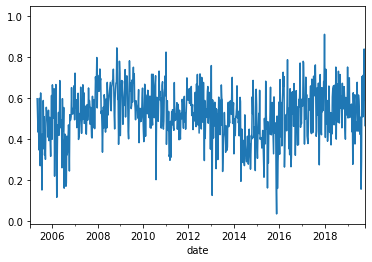

In [50]:
# plot stories by sentiment, resampled weekly, averaged out
tsa.vader.resample('w').mean().plot()

In [51]:
# assign new df for the weekly sample of vader
weekly_tsa=pd.DataFrame(tsa.vader.resample('w').mean())
weekly_tsa

,vader
date,
2005-01-16,0.998220
2005-01-23,NaN
2005-01-30,0.999800
2005-02-06,NaN
2005-02-13,NaN
...,...
2019-09-15,0.712144
2019-09-22,0.589789
2019-09-29,0.839537


In [52]:
# drop 14 nulls
weekly_tsa = weekly_tsa.dropna()
weekly_tsa.isna().sum()

vader    0
dtype: int64

In [53]:
# add vader difference from week to week
weekly_tsa['weekly_diff']= weekly_tsa.vader.diff(1)
weekly_tsa.head()

,vader,weekly_diff
date,,
2005-01-16,0.998220,NaN
2005-01-30,0.999800,0.001580
2005-05-08,0.596417,-0.403383
2005-05-15,0.503421,-0.092997
2005-05-22,0.433512,-0.069909


### What week saw the biggest drop in sentiment?  

In [54]:
weekly_tsa.weekly_diff.idxmin()

Timestamp('2010-08-01 00:00:00')

- At Least 400 Killed in Pakistan Floods (July 30)
- Plane Crash in Pakistan Kills All 152 on Board (July 28)
- U.S. Economy Lost 131,000 Jobs in July; Unemployment Remains at 9.5% (Aug. 6)
- CA Gay Marriage Ban Overturned (Aug. 4)

### Not a lot of concrete evidence of what would cause such a drop

### And the biggest increasee?

In [55]:
weekly_tsa.weekly_diff.idxmax()

Timestamp('2015-11-29 00:00:00')

- 13November2015: Paris terrorist attacks
- Three Killed at Planned Parenthood Shooting in Colorado Springs (Nov. 27)
- Russian Airliner Brought Down by Bomb (Nov. 17)

### Again, nothing concrete: an index of the noise in the data

In [56]:
weekly_tsa.vader.idxmax()

Timestamp('2005-01-30 00:00:00')

In [57]:
weekly_tsa.vader.idxmin()

Timestamp('2015-11-22 00:00:00')

In [58]:
BREAK THE NOTEBOOK

SyntaxError: invalid syntax (<ipython-input-58-07d8789a56ee>, line 1)

## Below begins my attempt to use gensim for LDA topic modeling

In [ ]:
# import gensim
# from gensim.utils import simple_preprocess
# import nltk
# nltk.download('stopwords')
# from nltk.corpus import stopwords
# stop_words = stopwords.words('english')
# # stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
# def sent_to_words(sentences):
#     for sentence in sentences:
#         # deacc=True removes punctuations
#         yield(gensim.utils.simple_preprocess(str(sentence), deacc=False))
# def remove_stopwords(texts):
#     return [[word for word in simple_preprocess(str(doc)) 
#              if word not in stop_words] for doc in texts]
# data = stories.lemmatized.values.tolist()
# data_words = list(sent_to_words(data))
# # remove stop words
# data_words = remove_stopwords(data_words)
# print(data_words[:1][0][:30])

In [ ]:
# import gensim.corpora as corpora
# # Create Dictionary
# id2word = corpora.Dictionary(data_words)
# # Create Corpus
# texts = data_words
# # Term Document Frequency
# corpus = [id2word.doc2bow(text) for text in texts]
# # View
# print(corpus[:1][0][:30])

In [ ]:
# from pprint import pprint
# # number of topics
# num_topics = 10
# # Build LDA model
# lda_model = gensim.models.LdaMulticore(corpus=corpus,
#                                        id2word=id2word,
#                                        num_topics=num_topics)
# # Print the Keyword in the 10 topics
# pprint(lda_model.print_topics())
# doc_lda = lda_model[corpus]

In [ ]:
# # import pyLDAvis.gensim
# import os
# import pyLDAvis.gensim_models as gensimvis
# import pickle 
# import pyLDAvis
# # Visualize the topics
# pyLDAvis.enable_notebook()
# # LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+ str(num_topics)+str(num_topics))
# # # this is a bit time consuming - make the if statement True
# # # if you want to execute visualization prep yourself
# if 1 == 1:
# #     LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
#     LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
# #     with open(LDAvis_data_filepath, 'wb') as f:
# #         pickle.dump(LDAvis_prepared, f)
# # load the pre-prepared pyLDAvis data from disk
# # with open(LDAvis_data_filepath, 'rb') as f:
# #     LDAvis_prepared = pickle.load(f)
# # pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')
# LDAvis_prepared

In [ ]:
# type(LDAvis_prepared)

In [ ]:
# BREAK. THIS. NOTEBOOK. 

## The same...but running it on the titles instead of the corpi

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=False))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = stories.title.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

In [ ]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

In [ ]:
# import pyLDAvis.gensim
import os
import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
# LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+ str(num_topics)+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
#     LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
#     with open(LDAvis_data_filepath, 'wb') as f:
#         pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
# with open(LDAvis_data_filepath, 'rb') as f:
#     LDAvis_prepared = pickle.load(f)
# pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

## Evaluate? (be aware of which  data_words are being sent in)

In [ ]:
# # Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [ ]:
# NLTK Stop words
# import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
import spacy
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner']) # see https://spacy.io/models/en for info on this pipeline
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
print(data_lemmatized[:1])

In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)
# Create Corpus
texts = data_lemmatized
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1])

In [ ]:
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [ ]:
# from pprint import pprint
# # Print the Keyword in the 10 topics
# pprint(lda_model.print_topics())
# doc_lda = lda_model[corpus]

In [ ]:
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

In [ ]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

## The following code is commented out bc it takes ages to run, and I have the results csv from when I ran it

In [ ]:
# import numpy as np
# import tqdm
# grid = {}
# grid['Validation_Set'] = {}
# # Topics range
# min_topics = 2
# max_topics = 11
# step_size = 1
# topics_range = range(min_topics, max_topics, step_size)
# # Alpha parameter
# alpha = list(np.arange(0.01, 1, 0.3))
# alpha.append('symmetric')
# alpha.append('asymmetric')
# # Beta parameter
# beta = list(np.arange(0.01, 1, 0.3))
# beta.append('symmetric')
# # Validation sets
# num_of_docs = len(corpus)
# corpus_sets = [# gensim.utils.ClippedCorpus(corpus, num_of_docs*0.25), 
#                # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.5), 
#                gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)), 
#                corpus]
# corpus_title = ['75% Corpus', '100% Corpus']
# model_results = {'Validation_Set': [],
#                  'Topics': [],
#                  'Alpha': [],
#                  'Beta': [],
#                  'Coherence': []
#                 }
# # Can take a long time to run
# if 1 == 1:
#     pbar = tqdm.tqdm(total=540)
    
#     # iterate through validation corpuses
#     for i in range(len(corpus_sets)):
#         # iterate through number of topics
#         for k in topics_range:
#             # iterate through alpha values
#             for a in alpha:
#                 # iterare through beta values
#                 for b in beta:
#                     # get the coherence score for the given parameters
#                     cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
#                                                   k=k, a=a, b=b)
#                     # Save the model results
#                     model_results['Validation_Set'].append(corpus_title[i])
#                     model_results['Topics'].append(k)
#                     model_results['Alpha'].append(a)
#                     model_results['Beta'].append(b)
#                     model_results['Coherence'].append(cv)
                    
#                     pbar.update(1)
#     pd.DataFrame(model_results).to_csv('lda_tuning_results_corpora.csv', index=False)
#     pbar.close()

In [ ]:
# use the above-selected parameters to train the model

lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.01,
                                           eta=0.9)

In [ ]:
import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
LDAvis_prepared

In [ ]:
pyLDAvis.save_html(LDAvis_prepared, "LDAvis_prepared_titles_4topics2.html")

In [ ]:
eval_df = pd.read_csv("lda_tuning_results.csv")
eval_df

In [ ]:
import seaborn as sns
sns.lineplot(data= eval_df,x="Topics",y='Coherence')

In [ ]:
eval_df[eval_df.Topics == 8].groupby(by='Alpha').Coherence.max()

## These were the results as run on the TITLES, not on the stories themselves

# Topic modeling on aggregations?
- melissa block vs the rest maybe??

In [59]:
stories.head()

,story_id_num,lemmatized,vader,title,date,host,program
0,17,he is in cahoot with a foreign government to m...,0.9964,n.j. democrat on reported whistleblower compla...,2019-09-22,melissa block,weekend edition sunday
1,18,"come with concrete plan , not beautiful speech...",0.9993,"ahead of climate summit, 2 views from cities i...",2019-09-22,melissa block,weekend edition sunday
2,19,if you stand outside the old dekalb county cou...,0.9974,"barred from removing confederate monument, cou...",2019-09-22,melissa block,weekend edition sunday
3,20,you may have spotted pink salt in your superma...,0.4950,pakistan's pink himalayan salt has become a ma...,2019-09-22,melissa block,weekend edition sunday
4,21,"singing in foreign language . the other day , ...",0.9730,"10 years after haiti's earthquake, 'this music...",2019-09-22,melissa block,weekend edition sunday


In [60]:
block = stories[stories.host=='melissa block']
block.sample(5)

,story_id_num,lemmatized,vader,title,date,host,program
32831,99207,along iraq s long border to the west with syri...,0.9862,"along iraq-syria border, two key crossings fal...",2014-06-23,melissa block,all things considered
56431,132277,"from npr news , this is all thing considered. ...",0.9984,earth's shadow to swallow moon in total eclipse,2008-02-20,melissa block,all things considered
34588,101524,the syrian peace conference got off to a bitte...,0.4323,syrian peace talks open with bitterness and a ...,2014-01-22,melissa block,all things considered
29764,94829,to the upper peninsula of michigan now for new...,0.9904,icy traffic jam on lake superior has 18 ships ...,2015-04-08,melissa block,all things considered
60448,139526,"now to damascus. for reaction there , we re jo...",-0.9953,damascus rejects u.n. report on hariri death,2005-10-25,melissa block,all things considered


In [62]:
other_hosts=stories[stories.host!='melissa block']
other_hosts.sample(5)

,story_id_num,lemmatized,vader,title,date,host,program
31377,97269,"now politics with our regular commentator , co...",0.9980,"week in politics: ebola, midterms",2014-10-24,robert siegel,all things considered
22017,81240,this is talk of the nation. i m neal conan in ...,0.9998,research examines why kids start smoking,2005-12-08,neal conan,talk of the nation
61115,140676,"from npr news , this is all thing considered. ...",0.9993,artificial disc offers new hope for treating b...,2005-05-10,robert siegel,all things considered
35433,102648,france is trying lot of thing to turn it econo...,0.9942,will the french really pay more for 'made in f...,2013-11-11,robert siegel,all things considered
6601,31524,the television star who burnished his fame wit...,0.9932,"before a divided congress, trump to give state...",2019-02-05,steve inskeep,morning edition


In [81]:
stories.program.value_counts()

/usr/local/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


morning edition             26688
all things considered       17761
talk of the nation           7248
weekend edition saturday     4944
news & notes                 2801
weekend edition sunday       1682
day to day                     41
Name: program, dtype: int64

In [82]:
morning_edition = stories[stories.program == 'morning edition']
morning_edition.sample(5)

/usr/local/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,story_id_num,lemmatized,vader,title,date,host,program
25082,86997,"let s turn now to health care. next week , a m...",0.9974,"telemedicine expands, though financial prospec...",2015-09-30,renee montagne,morning edition
1488,4514,it s morning edition from npr news. in washing...,-0.9900,migrants sent back to mexico are in dangerous ...,2019-07-09,noel king,morning edition
53269,127800,a high level american delegation left cuba yes...,0.8658,navajos sign cuba trade deal,2006-08-24,renee montagne,morning edition
25506,87702,"in ethiopia today , a military band struck up ...",0.9937,obama talks candidly about flaws in kenya's so...,2015-07-27,steve inskeep,morning edition
34885,101950,moving on to another billion dollar tech deal ...,0.5859,microsoft to buy patents from aol for $1.1 bil...,2012-04-10,renee montagne,morning edition


In [83]:
news_notes = stories[stories.program == 'news & notes']
news_notes.sample(5)

/usr/local/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,story_id_num,lemmatized,vader,title,date,host,program
11770,58348,"i m farai chideya , and this is news and note ...",0.9995,black ceo one of four on fortune 500,2006-04-11,farai chideya,news & notes
7623,33648,"before he died , johnnie cochran helped create...",0.3203,controversy at cochran law firm,2007-07-23,tony cox,news & notes
787,2889,"singing i remember you , baby , back in the 19...",0.9997,bluesman taj mahal returns with 'maestro',2008-12-16,tony cox,news & notes
7321,32981,i m farai chideya. and this is news note . twe...,0.9995,riding his way to the top,2007-08-20,farai chideya,news & notes
637,2532,"from npr news , this is news notes. i m farai ...",0.9987,burris seems likely to be seated in u.s. senate,2009-01-07,farai chideya,news & notes


In [102]:
tsa.head()

/usr/local/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,story_id_num,lemmatized,vader,title,date,host,program
date,,,,,,,
2005-01-11,84430,this is talk of the nation. i m neal conan in ...,1.0000,state legislatures: agendas and budgets,2005-01-11,neal conan,talk of the nation
2005-01-11,84432,this is talk of the nation. i m neal conan in ...,0.9999,difference between a think and a 'blink',2005-01-11,neal conan,talk of the nation
2005-01-11,84433,this is talk of the nation. i m neal conan in ...,0.9999,bush picks judge to head homeland security,2005-01-11,neal conan,talk of the nation
2005-01-11,84434,scientist at the national oceanic and atmosphe...,0.9914,noaa aims for predicting tsunamis,2005-01-11,neal conan,talk of the nation
2005-01-11,84431,this is talk of the nation. i m neal conan in ...,0.9999,california rains bring rash of mudslides,2005-01-11,neal conan,talk of the nation


In [108]:
tsa.index = pd.to_datetime(tsa.index)


/usr/local/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [110]:
from datetime import datetime

/usr/local/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [120]:
tsa = tsa.set_index('date').sort_index()

/usr/local/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
Obama_election = tsa[datetime(2008,11,7):datetime(2008,11,30)]

In [128]:
Obama_election.tail()

/usr/local/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,story_id_num,lemmatized,vader,title,host,program
date,,,,,,
2008-11-29,75286,"coming up , a lot of conversation with npr s p...",0.8885,announcing our new vlog,scott simon,weekend edition saturday
2008-11-29,75285,"a ha been noted all week , mumbai is the finan...",0.9461,"economic ripples from mumbai, citigroup",scott simon,weekend edition saturday
2008-11-29,75289,journalist are supposed to make certain they d...,0.9328,reporter stars in his own story,scott simon,weekend edition saturday
2008-11-29,75290,this is weekend edition from npr news. i m sco...,0.9995,"jon scieszka, a seriously funny 'knucklehead'",scott simon,weekend edition saturday
2008-11-29,75291,we re at the cutler ridge middle school in cut...,0.9992,dave barry's science fair tricks,scott simon,weekend edition saturday


In [ ]:
Trump_election = tsa[datetime(2016,11,7):datetime(2016,11,30)]

In [131]:
Trump_election.tail()

/usr/local/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,story_id_num,lemmatized,vader,title,host,program
date,,,,,,
2016-11-30,78544,senator jeff flake of arizona ha a message for...,0.9965,sen. flake aims to work with trump on a fix to...,steve inskeep,morning edition
2016-11-30,78543,good morning. i m steve inskeep. you are not s...,0.9468,free elton john concert tickets get border gua...,steve inskeep,morning edition
2016-11-30,78542,"in cuba today , a three day long procession be...",0.9959,complicated feelings: 'the little fidel in all...,steve inskeep,morning edition
2016-11-30,78541,"in zimbabwe , young people are emerging a outs...",-0.9970,young widow with 5 kids turns to activism to c...,david greene,morning edition
2016-11-30,78540,we know a little more this morning about presi...,0.9972,steve mnuchin expected to lead treasury in tru...,steve inskeep,morning edition


## Topic Model for Melissa Block vs. Other Hosts
## Also morning ed vs news and notes (bottom sentiment and top sentiment)

In [141]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=False))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = Trump_election.title.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['final', 'npr', 'battleground', 'map', 'race', 'snaps', 'back', 'clinton', 'maintains', 'advantage']


/usr/local/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/brianclements/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [142]:
# # Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

/usr/local/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [143]:
# NLTK Stop words
# import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

/usr/local/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [144]:
import spacy
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner']) # see https://spacy.io/models/en for info on this pipeline
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
print(data_lemmatized[:1])

/usr/local/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['final', 'map', 'race', 'snap', 'back', 'maintain', 'advantage']]


In [145]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)
# Create Corpus
texts = data_lemmatized
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)]]


/usr/local/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [146]:
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=5, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

/usr/local/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [147]:
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

/usr/local/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score:  0.6780502241663344


In [148]:
import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
LDAvis_prepared

/usr/local/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.124903  0.031186       1        1  24.827914
0      0.006607 -0.125939       2        1  20.690935
2     -0.060634  0.068760       3        1  20.433616
4     -0.088092 -0.006253       4        1  19.546093
3      0.017216  0.032246       5        1  14.501442, topic_info=           Term       Freq      Total Category  logprob  loglift
39     election  11.000000  11.000000  Default  30.0000  30.0000
128       class   9.000000   9.000000  Default  29.0000  29.0000
92        voter   4.000000   4.000000  Default  28.0000  28.0000
209     program   6.000000   6.000000  Default  27.0000  27.0000
48     remember   2.000000   2.000000  Default  26.0000  26.0000
..          ...        ...        ...      ...      ...      ...
62       animal   0.650100   1.750586   Topic5  -5.4890   0.9403
512   obamacare   0.650067   1.787198   Topic5  -5.4891   0.9196
153  transition   0.650063   3.580018   Topic5  -5.4891   0.2249
8        encore   0.650034   1.787213   Topic5  -5.4891   0.9195
468   secretary   0.650032   1.739684   Topic5  -5.4891   0.9465

[299 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
104       2  0.336391  administration
104       4  0.336391  administration
104       5  0.336391  administration
0         1  0.802738       advantage
324       4  0.834593          affect
...     ...       ...             ...
24        3  0.338382            year
24        4  0.338382            year
24        5  0.338382            year
279       2  0.551131            zika
279       4  0.551131            zika

[391 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3, 5, 4])

In [149]:
pyLDAvis.save_html(LDAvis_prepared, "Trump_election.html")

/usr/local/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
